# Business Understanding

## Project Domain


Domain: Kesehatan Masyarakat / Kesehatan Anak
Stunting merupakan kondisi gagal tumbuh pada balita akibat kekurangan gizi kronis, terutama dalam 1000 hari pertama kehidupan. Masalah ini berdampak pada perkembangan fisik dan kognitif anak, serta berisiko menurunkan produktivitas di masa depan. Deteksi dini stunting sangat penting agar intervensi gizi dan medis dapat dilakukan lebih cepat dan tepat.

## Problem Statements

1.Banyak balita yang terlambat terdeteksi mengalami stunting karena keterbatasan akses pemeriksaan medis dan kurangnya edukasi masyarakat.
2.Data kesehatan balita seringkali belum dimanfaatkan secara optimal untuk mendeteksi potensi stunting secara otomatis.
3.Petugas kesehatan membutuhkan alat bantu berbasis data yang bisa mempercepat proses identifikasi anak berisiko stunting

## Goals

1.Mengembangkan sistem deteksi dini stunting pada balita berdasarkan data antropometri (tinggi badan, berat badan, usia) dan faktor pendukung lain (jenis kelamin, status ASI, riwayat kesehatan, dll).
2.Meningkatkan akurasi dan kecepatan dalam mengklasifikasikan status balita apakah berisiko stunting atau tidak.
3.Memberikan rekomendasi atau informasi tambahan kepada petugas kesehatan dan orang tua untuk langkah selanjutnya.

## Solution Statements

1.Membangun model klasifikasi (menggunakan machine learning, seperti Artificial Neural Network) untuk mendeteksi balita yang berisiko stunting berdasarkan dataset kesehatan anak.
2.Menggunakan teknik analisis data dan visualisasi (EDA) untuk memahami pola-pola dalam data yang memengaruhi status gizi anak.
3.Menyediakan antarmuka (web atau mobile) sederhana untuk menampilkan hasil deteksi dan rekomendasi secara cepat dan mudah digunakan oleh petugas posyandu atau keluarga.

# Data Understanding

## Import data dari kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nurhasanahririn","key":"cb211814b2aaf211c3a6731f397870d8"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d rendiputra/stunting-balita-detection-121k-rows

Dataset URL: https://www.kaggle.com/datasets/rendiputra/stunting-balita-detection-121k-rows
License(s): MIT


In [ ]:
!mkdir stunting-balita-detection-121k-rows
!unzip stunting-balita-detection-121k-rows.zip -d stunting-balita-detection-121k-rows
!ls stunting-balita-detection-121k-rows

Archive:  stunting-balita-detection-121k-rows.zip
  inflating: stunting-balita-detection-121k-rows/data_balita.csv  
data_balita.csv


## Import Library yang dibutuhkan

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression # Import LogisticRegression from sklearn.linear_model

from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam

In [46]:
df = pd.read_csv("/content/stunting-balita-detection-121k-rows/data_balita.csv")
df.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


## Exploratory Data Analysis

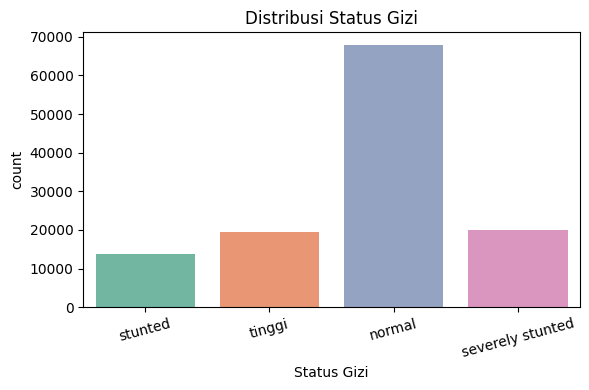

In [ ]:
# 1. Distribusi Status Gizi
plt.figure(figsize=(6, 4))
sns.countplot(x='Status Gizi', hue='Status Gizi', data=df, palette='Set2', legend=False)
plt.title('Distribusi Status Gizi')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

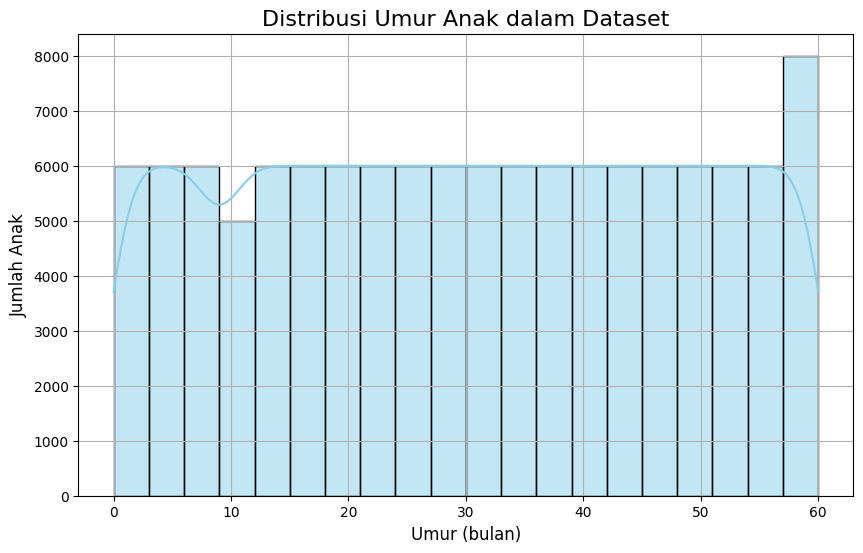

In [ ]:
#2. Distribusi Umur Anak dalam Dataset
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x='Umur (bulan)',
    bins=20,
    kde=True,
    color='skyblue')
plt.title('Distribusi Umur Anak dalam Dataset', fontsize=16)
plt.xlabel('Umur (bulan)', fontsize=12)
plt.ylabel('Jumlah Anak', fontsize=12)
plt.grid(True)
plt.show()

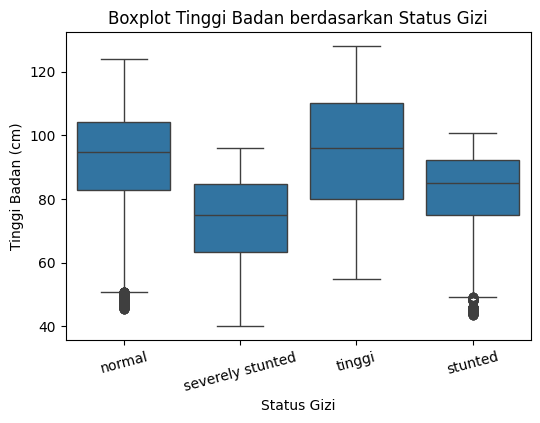

In [ ]:
# 3. Boxplot Tinggi Badan per Status Gizi
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x="Status Gizi",
    y="Tinggi Badan (cm)",
    order=df["Status Gizi"].value_counts().index)
plt.title("Boxplot Tinggi Badan berdasarkan Status Gizi")
plt.xticks(rotation=15)
plt.show()

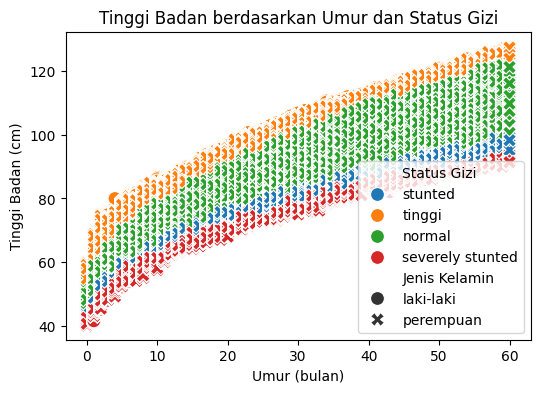

In [ ]:
# 4. Scatter Plot Tinggi Badan vs Umur
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df,
    x="Umur (bulan)",
    y="Tinggi Badan (cm)",
    hue="Status Gizi",
    style="Jenis Kelamin",
    s=100)
plt.title("Tinggi Badan berdasarkan Umur dan Status Gizi")
plt.show()

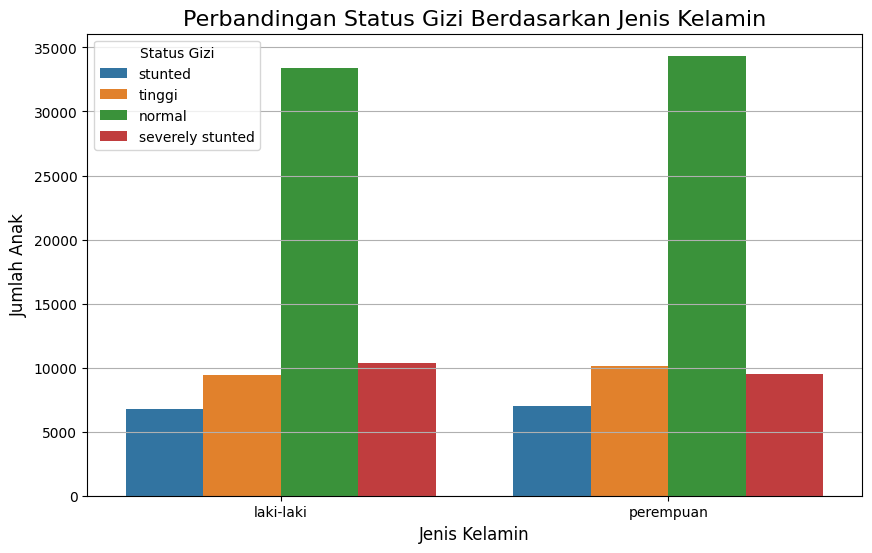

In [ ]:
# 5. Perbandingan Status Gizi berdasarkan Jenis Kelamin
plt.figure(figsize=(10, 6))
sns.countplot(data=df,
              x='Jenis Kelamin',
              hue='Status Gizi')
plt.title('Perbandingan Status Gizi Berdasarkan Jenis Kelamin', fontsize=16)
plt.xlabel('Jenis Kelamin', fontsize=12)
plt.ylabel('Jumlah Anak', fontsize=12)
plt.legend(title='Status Gizi')
plt.grid(axis='y')
plt.show()

# Data Preparation

In [58]:
joblib.dump(scaler, 'label_encoder.pkl')

['label_encoder.pkl']

In [48]:
# Membuat LabelEncoder
le = LabelEncoder()

In [52]:
df['Jenis Kelamin'] = le.fit_transform(df['Jenis Kelamin'])

In [56]:
df.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,0,44.591973,stunted
1,0,0,56.705203,tinggi
2,0,0,46.863358,normal
3,0,0,47.508026,normal
4,0,0,42.743494,severely stunted


In [ ]:
# Pisahkan fitur (x) dan target (y)
x = df.drop ('Status Gizi', axis=1)
y = df ['Status Gizi']

In [ ]:
# Split dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split (x, y, test_size=0.2, random_state=42) # Changed X to x

In [ ]:
# Normalisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeling

In [ ]:
# Create a LabelEncoder object
encoder = LabelEncoder()

In [ ]:
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [ ]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # definisikan input di awal
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

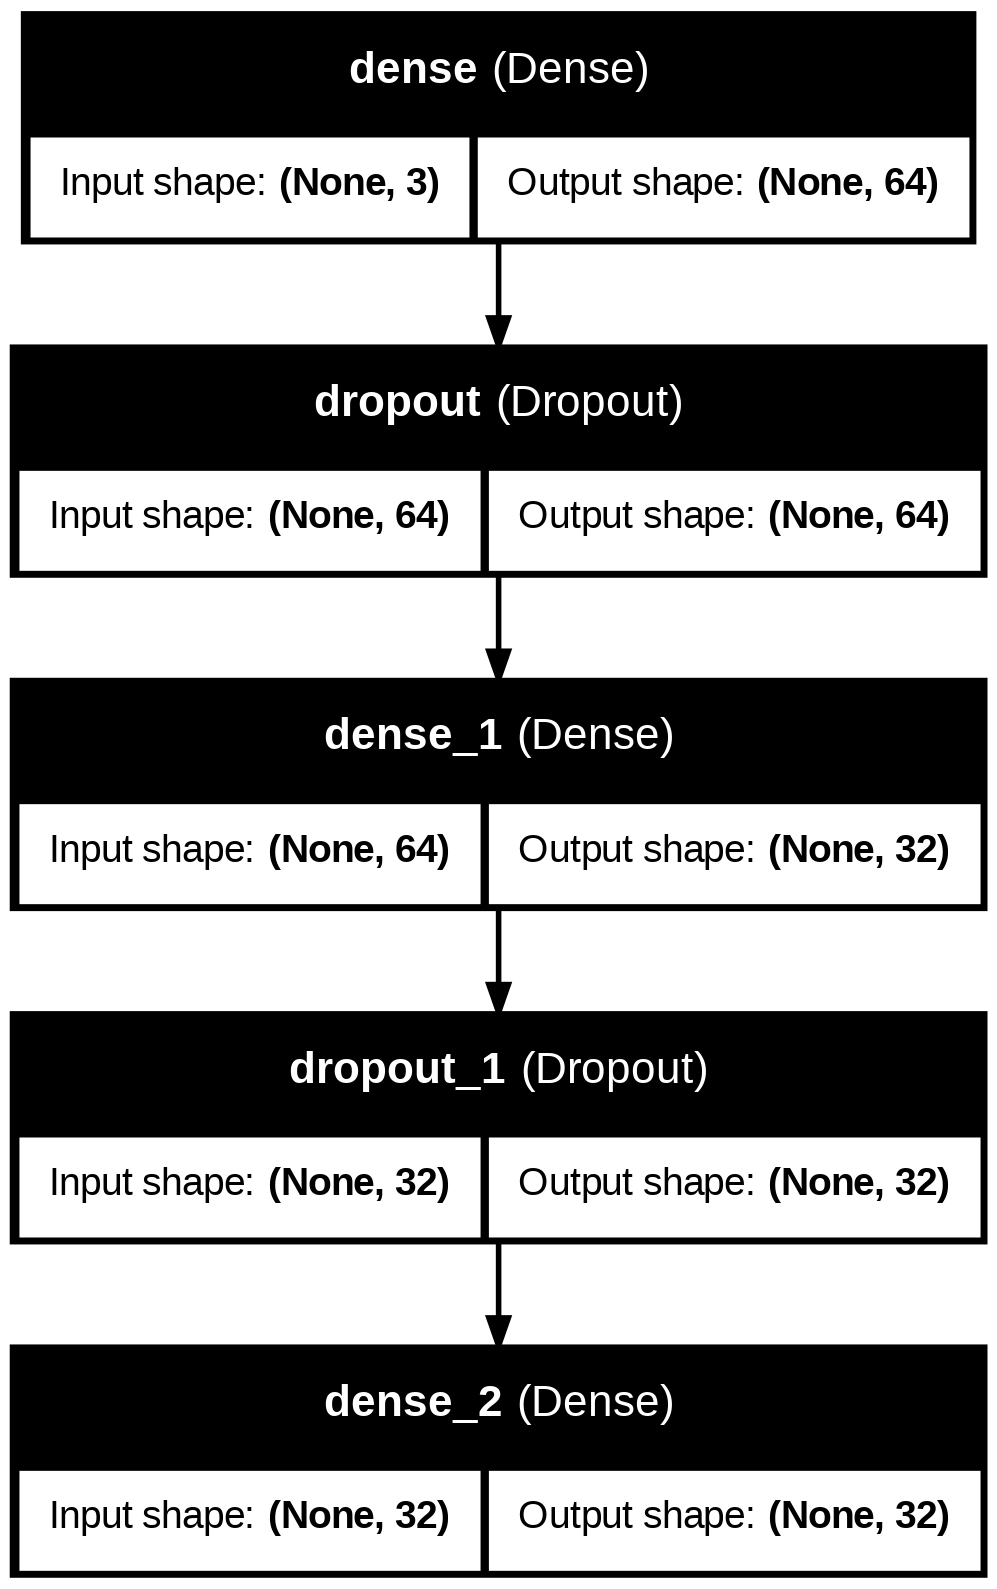

In [ ]:
# Plot arsitektur model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
3025/3025 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9622 - loss: 0.0964 - val_accuracy: 0.9727 - val_loss: 0.0621
Epoch 2/50
3025/3025 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9624 - loss: 0.0973 - val_accuracy: 0.9769 - val_loss: 0.0578
Epoch 3/50
3025/3025 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9601 - loss: 0.0997 - val_accuracy: 0.9793 - val_loss: 0.0522
Epoch 4/50
3025/3025 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9617 - loss: 0.0972 - val_accuracy: 0.9767 - val_loss: 0.0580
Epoch 5/50
3025/3025 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9609 - loss: 0.1002 - val_accuracy: 0.9811 - val_loss: 0.0523
Epoch 6/50
3025/3025 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9601 - loss: 0.0974 - val_accuracy: 0.9680 - val_loss: 0.0681
Epoch 7/50
3025/3025 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9621 - loss: 0.0951 - val_accuracy: 0.9771 - val_loss: 0.0626
Epoch 8/50
3025/3025 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9621 - loss: 0.09

# Evaluation

In [ ]:
#Prediksi pada data test

y_pred_prob = model.predict(X_test)
y_pred=(y_pred_prob > 0.5).astype (int) # Konversi probabilitas ke kelas biner

757/757 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


In [ ]:
# Menghitung akurasi
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Akurasi Model: {accuracy * 100:.2f}%")

757/757 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9717 - loss: 0.0653
Akurasi Model: 97.24%


In [ ]:
#Prediksi pada data test

y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Get the class with highest probability

757/757 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test,y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     13382
           1       0.98      1.00      0.99      4130
           2       0.89      0.96      0.92      2790
           3       0.99      0.95      0.97      3898

    accuracy                           0.97     24200
   macro avg       0.96      0.97      0.97     24200
weighted avg       0.97      0.97      0.97     24200



# Deployment

## Model Simulation

In [ ]:
! pip install joblib
import joblib

In [ ]:
joblib.dump(scaler, 'scaler_stunting.pkl')

['scaler_stunting.pkl']

In [ ]:
feature_names = ['usia_bulan', 'berat_badan', 'tinggi_badan', 'jenis_kelamin_Laki-laki']

In [ ]:
model = LogisticRegression() # Now LogisticRegression is defined and can be used
X_scaled = scaler.fit_transform(x) # Scale the data using your scaler object
model.fit(X_scaled, y)

LogisticRegression()

In [ ]:
def simulate_stunting_prediction(input_dict):
    try:
        # Konversi input ke DataFrame
        input_df = pd.DataFrame([input_dict])

        # Pastikan semua fitur sesuai urutan saat training
        input_df = input_df.reindex(columns=feature_names, fill_value=0)

        # Normalisasi input
        input_scaled = scaler.transform(input_df)

        # Prediksi
        prob = model.predict(input_scaled)[0][0]
        prediction = 1 if prob > 0.5 else 0

        # Tampilkan hasil prediksi
        print("\n===== SIMULASI PREDIKSI STUNTING =====")
        print("Input:", input_dict)
        print(f"Probabilitas stunting: {prob:.4f}")
        if prediction == 1:
            print("➡️ Balita diprediksi MENGALAMI STUNTING.")
        else:
            print("✅ Balita diprediksi TIDAK mengalami stunting.")
    except Exception as e:
        print("Terjadi error saat simulasi:", str(e))

## Save Model

In [ ]:
joblib.dump(model, 'stunting_model.pkl')

['stunting_model.pkl']